In [1]:
%run -m ipy_startup
%matplotlib inline
from research.wmi import data

In [2]:
db = data.load_all_tables()

Loading table "Alerts"
Loading table "Approvals"
Loading table "AssessmentSummaryInformation"
Loading table "AssessmentUpdateLog"
Loading table "BudgetAndResources"
Loading table "BudgetGroup"
Loading table "BudgetIdentifier"
Loading table "BudgetScheduleOfValuesAndProject"
Loading table "Budgets"
Loading table "Communications"
Loading table "Contacts"
Loading table "ContactsAndProjects"
Loading table "Countries"
Loading table "DistributionPoints"
Loading table "EmailReports"
Loading table "ErrorLog"
Loading table "ExternalDataMonitoring"
Skipping table "ExternalDataMonitoring" due to empty data file (/Users/eczech/data/research/wmi/wmi_db_20160515/ExternalDataMonitoring.csv)
Loading table "FollowUps"
Loading table "Forecasting"
Loading table "ForecastingUpdateLog"
Loading table "FundedAssessments"
Loading table "FundingSources"
Loading table "GS828DataLoggersAndAssessments"
Loading table "GroupOfAssessments"
Loading table "Groups"
Loading table "GroupsAndUsers"
Skipping table "GroupsA

In [24]:
[t for t in db if 'quality' in t.lower()]

['WaterQualityTests', 'WaterQualityStandards', 'WaterQualityTestParameters']

In [3]:
db['WaterQualityTests'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 0 to 4195
Data columns (total 12 columns):
TestID                 4196 non-null object
DistributionPointID    4196 non-null object
AssessmentID           4196 non-null object
SampleName             4196 non-null object
SampleDateAndTime      4196 non-null object
ApplicableReport       4195 non-null object
GPSLatitude            97 non-null object
GPSLongitude           100 non-null object
SampleType             113 non-null object
LabTechnicianName      4083 non-null object
DistributionType       119 non-null object
FollowUpReportDate     1677 non-null object
dtypes: object(12)
memory usage: 426.2+ KB


In [21]:
db['WaterQualityTests']['SampleType'].value_counts()

Raw        57
Treated    56
Name: SampleType, dtype: int64

In [5]:
db['WaterQualityStandards'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 9 columns):
Parameter                 42 non-null object
WaterQualityStandardID    42 non-null object
WHO                       28 non-null object
MBS                       22 non-null object
TestType                  42 non-null object
KBS                       20 non-null object
WMI                       18 non-null object
Units                     40 non-null object
UNBS                      21 non-null object
dtypes: object(9)
memory usage: 3.3+ KB


In [3]:
db['DistributionPoints']['WaterSampleType'].value_counts()

Distribution point        2409
Potential water source     831
Chosen water source        548
Possible water source        1
Name: WaterSampleType, dtype: int64

In [9]:
db['WaterQualityTestParameters'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75660 entries, 0 to 75659
Data columns (total 7 columns):
TestID                         75660 non-null object
Parameter                      75660 non-null object
Value                          59022 non-null object
AnalysisDateAndTime            72817 non-null object
AnalysisMethod                 16 non-null object
WaterQualityTestParameterID    75660 non-null object
Units                          51318 non-null object
dtypes: object(7)
memory usage: 4.6+ MB


In [26]:
db['WaterQualityTests']['SampleType'].value_counts()

Raw        57
Treated    56
Name: SampleType, dtype: int64

In [4]:
data.search_for_column(db, 'TestID')

['WaterQualityTestParameters', 'WaterQualityTests']

In [5]:
data.search_for_column(db, 'AssessmentID')

['Approvals',
 'AssessmentSummaryInformation',
 'AssessmentUpdateLog',
 'BudgetScheduleOfValuesAndProject',
 'Communications',
 'ContactsAndProjects',
 'DistributionPoints',
 'ErrorLog',
 'FollowUps',
 'FundedAssessments',
 'FundingSources',
 'GS828DataLoggersAndAssessments',
 'GroupOfAssessments',
 'InvolvedPersons',
 'LatestReportsCommunityManaged',
 'LatestReportsV1',
 'LifeLinkTransactions',
 'LifeLinkTransactionsTest',
 'LifeLinkUnits',
 'ManagementCapacityIndex',
 'MediaLinks',
 'MobileAppUserProjects',
 'NetSuiteTasks',
 'NewReports',
 'Notifications',
 'PartnersAndAssessments',
 'PhotosAndProjects',
 'ProjectsInformation',
 'ProjectsReportsCommunityManaged',
 'ProjectsReportsV1',
 'Reflections',
 'RelatedProjects',
 'RelationalAwarenessIndex',
 'ReportSummaryEmail',
 'Reports',
 'ReportsCommunityManaged',
 'SafeWaterProjectMonthlySummary',
 'ScheduledReports',
 'Tags',
 'Testimonials',
 'WaterQualityTests']

## Quantities to Explore

- FundedAssessments:TotalPeopleServed*
- LifeLinkTransactions:AssessmentID --> This is empty .. why?
- SafeWaterProjectMonthlySummary


In [41]:
# All columns in every table
cols = []
for t in db:
    cols.extend([t + ':' + v for v in db[t].columns])
list(np.unique(cols))

['Alerts:AlertID',
 'Alerts:AlertType',
 'Alerts:ComparisonReading',
 'Alerts:Email',
 'Alerts:SatWaterSerial',
 'Alerts:TimePeriod',
 'Alerts:TrendCompareTimePeriod',
 'Alerts:TrendLastTimePeriod',
 'Alerts:TrendPercentageOff',
 'Approvals:ApprovalID',
 'Approvals:ApprovalNote',
 'Approvals:ApprovalType',
 'Approvals:AssessmentID',
 'AssessmentSummaryInformation:AnticipatedPeopleServed',
 'AssessmentSummaryInformation:AssessmentCompletedOn',
 'AssessmentSummaryInformation:AssessmentID',
 'AssessmentSummaryInformation:AssessmentName',
 'AssessmentSummaryInformation:AssessmentNotes',
 'AssessmentSummaryInformation:Budget',
 'AssessmentSummaryInformation:Country',
 'AssessmentSummaryInformation:DevelopmentRelationshipManager',
 'AssessmentSummaryInformation:Feasible',
 'AssessmentSummaryInformation:FindFunding',
 'AssessmentSummaryInformation:FundingNotes',
 'AssessmentSummaryInformation:GPSLatitude',
 'AssessmentSummaryInformation:GPSLongitude',
 'AssessmentSummaryInformation:NetSuiteCP

In [46]:
id1 = db['ProjectsInformation']['AssessmentID'].unique()
id2 = db['SafeWaterProjectMonthlySummary']['AssessmentID'].unique()

In [50]:
len(id1), len(id2), len(np.setdiff1d(id1, id2)), len(np.setdiff1d(id2, id1)), len(np.intersect1d(id1, id2))

(1612, 130, 1488, 6, 124)

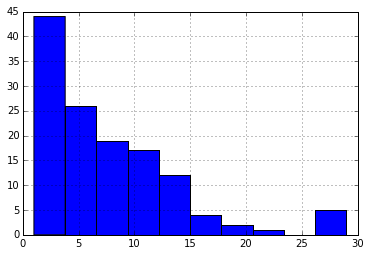

In [55]:
db['SafeWaterProjectMonthlySummary'].groupby('AssessmentID').size().hist()

In [19]:
db['SafeWaterProjectMonthlySummary'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 975
Data columns (total 38 columns):
AssessmentID                            976 non-null object
MonthAndYear                            976 non-null object
CashInBankBeginning                     920 non-null object
CashOnHandBeginning                     920 non-null object
IncomeSafeWaterSales                    920 non-null object
IncomeMonthlyTariffs                    920 non-null object
IncomeOtherSources                      920 non-null object
ExpensesWaterTreatmentSupplies          920 non-null object
ExpensesCommissionSWC                   920 non-null object
ExpensesCommissionOperators             920 non-null object
ExpensesSalariesOperators               920 non-null object
ExpensesOther                           920 non-null object
PettyCashWithheld                       920 non-null object
CashInBankEnd                           920 non-null object
CashOnHandEnd                           920 non-null ob

In [16]:
#db['InvolvedPersons'].info()
db['InvolvedPersons']['Role'].value_counts()

WASH Promoter training participant          1697
Secretary                                     90
Treasurer                                     82
Member                                        76
Chairman                                      74
Pastor                                        69
WASH Coordinator                              49
Teacher                                       45
Systems Operator 1                            31
Leader                                        26
Systems Operator 2                            25
Church Leader                                 22
Operator                                      22
Fiscal                                        20
System Operator                               20
Figure in community                           15
Church member                                 14
Village Headman                               13
Vice Secretary                                13
Village Elder                                 12
Treasure            

In [8]:
data.search_for_column(db, 'income')

['ProjectsInformation', 'SafeWaterProjectMonthlySummary']

In [14]:
pd.DataFrame([(k, len(v)) for k, v in db.items()], columns=['Table', 'Rows'])\
    .sort_values('Rows', ascending=False).set_index('Table')

,Rows
Table,
LifeLinkTransactions,1915583
AssessmentUpdateLog,600299
TimesheetUpdateLog,483836
TimesheetEntries,297430
WaterQualityTestParameters,75660
BudgetAndResources,75555
TimesheetLines,42490
Budgets,38638
BudgetGroup,38627


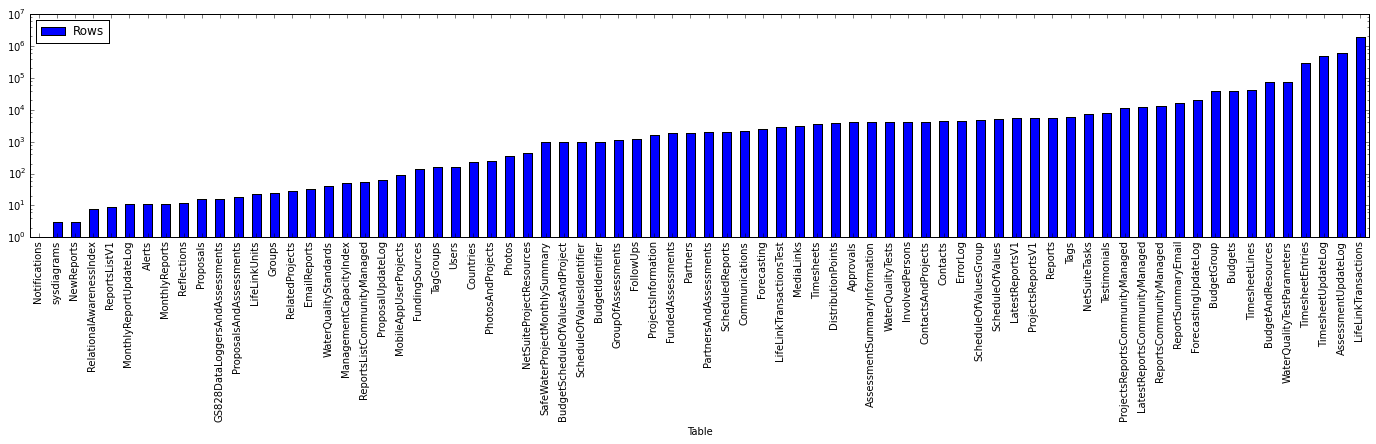

In [12]:
ax = pd.DataFrame([(k, len(v)) for k, v in db.items()], columns=['Table', 'Rows'])\
    .sort_values('Rows').set_index('Table').plot(kind='bar', figsize=(24,4))
ax.set_yscale('log')

In [28]:
db['SafeWaterProjectMonthlySummary'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 975
Data columns (total 38 columns):
AssessmentID                            976 non-null object
MonthAndYear                            976 non-null object
CashInBankBeginning                     920 non-null object
CashOnHandBeginning                     920 non-null object
IncomeSafeWaterSales                    920 non-null object
IncomeMonthlyTariffs                    920 non-null object
IncomeOtherSources                      920 non-null object
ExpensesWaterTreatmentSupplies          920 non-null object
ExpensesCommissionSWC                   920 non-null object
ExpensesCommissionOperators             920 non-null object
ExpensesSalariesOperators               920 non-null object
ExpensesOther                           920 non-null object
PettyCashWithheld                       920 non-null object
CashInBankEnd                           920 non-null object
CashOnHandEnd                           920 non-null ob

In [21]:
db['ProjectsInformation']['AnticipatedExchangeRate'].value_counts()

42.00       100
85.00        26
2.80         22
2.50         17
83.00        13
22.10        12
7.90         11
21.50        11
2850.00      11
22.00        10
9712.00      10
88.00        10
21.00         9
500.00        7
2500.00       7
20.60         7
87.00         6
95.00         6
2150.00       6
3.00          6
15.50         6
2550.00       6
21.40         5
11500.00      5
12.04         5
4000.00       5
11609.00      5
250.00        5
3400.00       4
15.00         4
           ... 
58.00         1
10.00         1
20.22         1
2700.00       1
13000.00      1
15000.00      1
22.13         1
3.30          1
3450.00       1
3.20          1
3500.00       1
12.50         1
14.50         1
3.35          1
360.00        1
1.00          1
20.70         1
3650.00       1
11900.00      1
12000.00      1
580.00        1
45.00         1
.00           1
21.70         1
22.80         1
20.56         1
7.76          1
7.50          1
14.00         1
7000.00       1
Name: AnticipatedExchang

In [12]:
db['ProjectsInformation'].describe().T

,count,mean,std,min,25%,50%,75%,max
AverageHouseholdIncome,682,2095253.598270,17554786.686424,0.0,4800.000,30000.00,120000.000,4.320000e+08
AnticipatedMonthlyOperationalCost,463,6792.602419,137855.798066,0.0,114.745,224.97,480.015,2.966667e+06
AnticipatedMonthlyReplacementCost,463,413.476674,1678.681047,0.0,158.490,190.56,298.855,3.008158e+04
AnticipatedHouseholdPenetration,458,342.342576,4271.078189,0.0,50.000,70.00,80.000,8.400000e+04
AnticipatedIndividualConsumption,455,11.637824,13.050263,0.0,5.500,10.00,13.000,1.200000e+02
AnticipatedExchangeRate,463,1216.797300,2980.762547,0.0,20.800,42.00,95.000,1.500000e+04
MaxAllowableWaterPrice,455,1.386556,19.522427,0.0,0.010,0.04,0.110,4.000000e+02
TargetMonthlySavings,170,450483.268600,1532902.162217,1.3,5256.500,8003.50,41024.250,1.504079e+07
TargetHouseholdsCollectingWater,170,242.141176,210.075284,27.0,104.250,182.00,300.000,1.250000e+03
TargetDailyHouseholdConsumption,170,205.271765,1297.774921,1.0,2.000,3.00,6.000,1.579500e+04


In [104]:
db['BudgetAndResources'].head()

,BudgetAndResourcesID,BudgetID,Phase,ProjectResourceNetSuiteInternalID,Hours,UnitWorkPercentage
0,221,288,1. Assessment,48101,0,100
1,222,288,2. Design,48101,0,100
2,223,288,3. Construction and installation,48101,0,100
3,224,288,4. Community Development,48101,0,100
4,225,288,5. Follow-up and support,48101,0,100


In [106]:
db['AssessmentSummaryInformation'].iloc[0]

AssessmentID                                            1
AssessmentName                      Bondeni water Project
GPSLatitude                                      .9952700
GPSLongitude                                   34.8893333
Population                                           7000
AnticipatedPeopleServed                              3000
Budget                                         19000.0000
FundingNotes                                H4O - $19,000
AssessmentNotes                                       NaN
Feasible                                              Yes
ProjectManager                                    mngania
Country                                             Kenya
Priority                                           Normal
AssessmentCompletedOn                          2008-03-16
FindFunding                                           NaN
NotifyOnUpdateEmails              kherr@watermissions.org
Region                                                NaN
ProjectClassif

In [13]:
db['AssessmentSummaryInformation']['ProjectClassification'].value_counts()

N/A - Old project                              1993
Development - WMI community managed model       560
Disaster response                               159
Development - Institutionally managed model      89
Professional services                            31
Development - Other                              24
Development - TradeWater                         20
Other                                            20
Name: ProjectClassification, dtype: int64

In [110]:
sorted(list(db.keys()))

['Alerts',
 'Approvals',
 'AssessmentSummaryInformation',
 'AssessmentUpdateLog',
 'BudgetAndResources',
 'BudgetGroup',
 'BudgetIdentifier',
 'BudgetScheduleOfValuesAndProject',
 'Budgets',
 'Communications',
 'Contacts',
 'ContactsAndProjects',
 'Countries',
 'DistributionPoints',
 'EmailReports',
 'ErrorLog',
 'FollowUps',
 'Forecasting',
 'ForecastingUpdateLog',
 'FundedAssessments',
 'FundingSources',
 'GS828DataLoggersAndAssessments',
 'GroupOfAssessments',
 'Groups',
 'InvolvedPersons',
 'LatestReportsCommunityManaged',
 'LatestReportsV1',
 'LifeLinkTransactions',
 'LifeLinkTransactionsTest',
 'LifeLinkUnits',
 'ManagementCapacityIndex',
 'MediaLinks',
 'MobileAppUserProjects',
 'MonthlyReportUpdateLog',
 'MonthlyReports',
 'NetSuiteProjectResources',
 'NetSuiteTasks',
 'NewReports',
 'Notifications',
 'Partners',
 'PartnersAndAssessments',
 'Photos',
 'PhotosAndProjects',
 'ProjectsInformation',
 'ProjectsReportsCommunityManaged',
 'ProjectsReportsV1',
 'ProposalUpdateLog',
 'P

In [131]:
db['PartnersAndAssessments'].head()

,AssessmentID,PartnerID,PartnerType,PartnersAndAssessmentsID
0,116,18,NaN,1053
1,2,20,NaN,1054
2,3,21,NaN,1055
3,4,23,NaN,1056
4,14,25,NaN,1057


In [121]:
db['ProjectsInformation'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 1630
Data columns (total 54 columns):
AssessmentID                                           1621 non-null object
AverageHouseholdIncome                                 682 non-null float64
AverageHouseholdIncomeUnits                            743 non-null object
AnticipatedMonthlyOperationalCost                      463 non-null float64
AnticipatedMonthlyReplacementCost                      463 non-null float64
AnticipatedHouseholdPenetration                        458 non-null float64
AnticipatedIndividualConsumption                       455 non-null float64
AnticipatedExchangeRate                                463 non-null float64
AnticipatedDailyProduction                             470 non-null object
MaxAllowableWaterPrice                                 455 non-null float64
TargetMonthlyOperationalCosts                          173 non-null object
TargetMonthlySavings                                   170 n

# Individual Dataset Loading Routines

In [58]:
def assessment_summary_information():
    d = load_table('AssessmentSummaryInformation')
    d['AssessmentID'] = pd.to_numeric(d['AssessmentID'], errors='corece')
    return d[d['AssessmentID'].notnull()]
d = assessment_summary_information()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 0 to 5737
Data columns (total 23 columns):
AssessmentID                      4116 non-null float64
AssessmentName                    4084 non-null object
GPSLatitude                       3136 non-null object
GPSLongitude                      3135 non-null object
Population                        2182 non-null object
AnticipatedPeopleServed           2203 non-null object
Budget                            1244 non-null object
FundingNotes                      2447 non-null object
AssessmentNotes                   1751 non-null object
Feasible                          1924 non-null object
ProjectManager                    3586 non-null object
Country                           3505 non-null object
Priority                          3590 non-null object
AssessmentCompletedOn             1448 non-null object
FindFunding                       299 non-null object
NotifyOnUpdateEmails              50 non-null object
Region         

In [52]:
d1[d1['AssessmentID2'].isnull()]

,AssessmentID,AssessmentName,GPSLatitude,GPSLongitude,Population,AnticipatedPeopleServed,Budget,FundingNotes,AssessmentNotes,Feasible,...,FindFunding,NotifyOnUpdateEmails,Region,ProjectClassification,DevelopmentRelationshipManager,ProjectSubclassification,ProjectType,NetSuiteCPInternalID,NetSuiteUSInternalID,AssessmentID2
16,Very Old assessment,No,mjosue,Sri Lanka,Normal,2008-03-27,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
65,NaN,Yes,djan,Indonesia,Normal,2007-08-02,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
88,Old project that would need new assesment to p...,No,mjosue,Sri Lanka,Normal,2008-05-28,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
115,The system has moved to Simpang Selayang,Yes,djan,Indonesia,Normal,2007-12-20,NaN,NaN,NaN,N/A - Old project,...,3136,None,None,None,None,None,None,NaN,NaN,NaN
119,The NGO that request us to enter this area had...,No,djan,Indonesia,Normal,2008-03-11,NaN,NaN,NaN,N/A - Old project,...,NaN,None,None,None,None,None,None,NaN,NaN,NaN
132,Retrofit completed 2/2/09,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
133,Municipality: LA CEIBA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
134,Dept name: ATLANTIDA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
135,"Operator: Carlos Gonzales, Tel. 9884.2400",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
136,NaN,Yes,hchacon,Honduras,Normal,2000-01-01,NaN,NaN,NaN,N/A - Old project,...,3013,None,None,None,None,None,None,NaN,NaN,NaN


In [25]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5737
Data columns (total 23 columns):
AssessmentID                      5621 non-null object
AssessmentName                    4591 non-null object
GPSLatitude                       3649 non-null object
GPSLongitude                      3660 non-null object
Population                        2707 non-null object
AnticipatedPeopleServed           2674 non-null object
Budget                            1472 non-null object
FundingNotes                      2465 non-null object
AssessmentNotes                   1753 non-null object
Feasible                          2449 non-null object
ProjectManager                    3600 non-null object
Country                           3516 non-null object
Priority                          3604 non-null object
AssessmentCompletedOn             1555 non-null object
FindFunding                       407 non-null object
NotifyOnUpdateEmails              62 non-null object
Region          

In [ ]:
d2 = 

In [33]:
d1.groupby('Country')['AnticipatedPeopleServed'].mean()

DataError: No numeric types to aggregate